# Advanced Text2Cypher

In [1]:
import sys
DIR_SHIFT = "../../"
sys.path.append(DIR_SHIFT)

In [2]:
from IPython.display import Image, display

from langchain_neo4j import Neo4jGraph
from langchain_openai import ChatOpenAI

from ps_genai_agents.workflows.multi_agent import create_text2cypher_workflow
from ps_genai_agents.components.state import OutputState
from ps_genai_agents.retrievers.cypher_examples import YAMLCypherExampleRetriever

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
graph = Neo4jGraph(enhanced_schema=True)

In [5]:
llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [6]:
cypher_query_yaml_file_path = DIR_SHIFT+"data/iqs/queries/queries.yml"
cypher_example_retriever = YAMLCypherExampleRetriever(cypher_query_yaml_file_path=cypher_query_yaml_file_path)

In [7]:
scope_description = "This application may answer questions related to customer feedback on Honda vehicles."

In [8]:
agent = create_text2cypher_workflow(llm=llm, 
                                    graph=graph, 
                                    scope_description=scope_description, 
                                    cypher_example_retriever=cypher_example_retriever, 
                                    llm_cypher_validation=False, 
                                    attempt_cypher_execution_on_final_attempt=True)

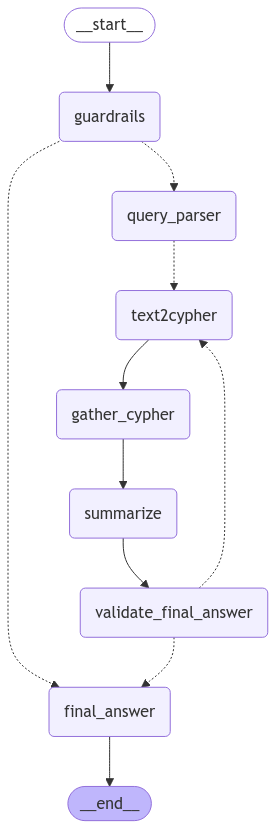

In [9]:
display(Image(agent.get_graph().draw_mermaid_png()))

In [10]:
response = agent.invoke({"question": "Summarize the responses under fcd10 for honda pilot. What is the men to women proportion for these responses and what is the problem for fcd10?"})

In [11]:
print(response.get("question"), "\n")
print(response.get("answer"))

Summarize the responses under fcd10 for honda pilot. What is the men to women proportion for these responses and what is the problem for fcd10? 

**Summary of Responses under FCD10 for Honda Pilot:**

- The touch system to lock and unlock the doors does not work consistently, causing frustration.
- Doors sometimes remain locked despite attempts to unlock them using the key fob or door controls.
- The auto-lock feature occasionally fails, leaving the vehicle unlocked.
- The door handles sometimes lock the doors instead of unlocking them, requiring multiple attempts or the use of the key fob.
- The front door often does not unlock easily, necessitating manual unlocking with the key.
- If someone tries to open the door while unlocking, it can cause a temporary lockout.

**Men to Women Proportion for These Responses:**
- Male to Female Ratio: 0.4

**Problem for FCD10:**
- Door locks are broken or work inconsistently.


In [12]:
[(print(c.get("subquestion") + "\n\n"), [print(r) for r in c.get("records")], print("\n\n")) for c in response.get("cyphers")]

Summarize the responses under fcd10 for Honda Pilot.


{'responseSummary': 'Touch system to lock and unlock does not work most of the time.  Real pain.'}
{'responseSummary': 'They have got stuck twice I had to open the door manually since it only opened the drivers door not matter how many times I would press the unlock button on the key fob or the door unlock button'}
{'responseSummary': "I have had at least 2 times I could not open the driver's side passenger door. I relocked and unlocked the doors with no luck and had to go in the other side and open from the inside. The child lock was not engaged. No idea why it's happened?"}
{'responseSummary': 'My vehicle system is set to auto-lock the doors when the key fob retreats to about 10 feet away, I believe. Most of the time it does. But there have been several times when I return to the vehicle and the locks do not "unlock" when I touch the door handle because they didn\'t appear to be locked in the first place. I can tell by looking in

[(None, [None, None, None, None, None, None, None, None], None),
 (None, [None], None),
 (None, [None], None)]